# 1. Importing Library and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/Binar Academy/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Data Exploration

In [3]:
df.shape

(4250, 20)

In [4]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
df.info

<bound method DataFrame.info of      state  account_length      area_code international_plan voice_mail_plan  \
0       OH             107  area_code_415                 no             yes   
1       NJ             137  area_code_415                 no              no   
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
4       MA             121  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      n

In [6]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
churn_cnt = df.groupby(["churn"])[["churn"]].count()
churn_cnt.rename(columns={"churn": "count"}, inplace=True)
churn_cnt.reset_index(inplace=True)
churn_cnt = churn_cnt.reset_index(drop=True).rename_axis(None, axis=1)
churn_cnt = churn_cnt.sort_values(by="count", ascending=False)
churn_cnt

,churn,count
0,no,3652
1,yes,598


In [9]:
import plotly.express as px
fig = px.bar(churn_cnt, 
             x="churn", y="count", 
             color="churn",
             color_discrete_sequence=["green", "red"],
             text="count", 
             title="Count per Category")
fig.show()

In [10]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [11]:
numerics_type = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = df.select_dtypes(include=numerics_type)
numerics_col = list(numerics.columns)
numerics_col

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [12]:
category = df.select_dtypes(exclude=numerics_type)
category = category.drop('churn', axis = 1)
category_col = list(category.columns)
category_col

['state', 'area_code', 'international_plan', 'voice_mail_plan']

## Categorical Value 

In [13]:
for categories in category_col:
  cnt = df.groupby([categories])[[categories]].count()
  cnt.rename(columns={categories: "count"}, inplace=True)
  cnt.reset_index(inplace=True)
  cnt['count'] = round(cnt['count']/df.shape[0] , 2) * 100
  fig = px.bar(cnt, 
             x=categories, y="count", 
             text=cnt['count'].apply(lambda x: '{0:1.2f}%'.format(x)))
  fig.update_layout(title_text=categories + ' distribution', title_x=0.5, yaxis_tickformat = ',.%', yaxis_title="count percentage")
  fig.show()

In [14]:
for categories in category_col:
  cnt = df.groupby([categories, "churn"])[["churn"]].count()
  cnt.rename(columns={"churn": "count"}, inplace=True)
  cnt.reset_index(inplace=True)
  cnt['count'] = round(cnt['count']/df.shape[0] , 2) * 100
  fig = px.bar(cnt, 
             x=categories, y="count", 
             color="churn",
             text=cnt['count'].apply(lambda x: '{0:1.2f}%'.format(x)), 
             barmode="group")
  fig.update_layout(title_text=categories + ' distribution', title_x=0.5, yaxis_tickformat = ',.%', yaxis_title="count percentage")
  fig.show()

## Numerical Value

In [15]:
df[df.columns].skew(axis = 0, skipna = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



account_length                   0.122327
number_vmail_messages            1.373091
total_day_minutes               -0.006910
total_day_calls                 -0.085812
total_day_charge                -0.006913
total_eve_minutes               -0.030415
total_eve_calls                 -0.020812
total_eve_charge                -0.030388
total_night_minutes              0.008491
total_night_calls                0.005273
total_night_charge               0.008445
total_intl_minutes              -0.241360
total_intl_calls                 1.360122
total_intl_charge               -0.241671
number_customer_service_calls    1.082692
dtype: float64

In [16]:
for numericals in numerics_col:
  fig = px.histogram(df, x=numericals, histnorm='percent')
  fig.update_layout(title_text=numericals + ' distribution', title_x=0.5)
  fig.show()

In [17]:
for numericals in numerics_col:
  fig = px.histogram(df, x=numericals, facet_col="churn", color = "churn", histnorm='percent')
  fig.update_layout(title_text=numericals + ' distribution', title_x=0.5)
  fig.show()

# 3. Data Preprocessing

## Data Splitting

In [18]:
data = df

X = data.drop('churn',axis=1)
y = data['churn']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
train_data = X_train
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1340,NC,115,area_code_415,yes,no,0,180.0,119,30.60,198.8,126,16.90,217.1,70,9.77,12.4,3,3.35,1
3790,SC,117,area_code_415,no,yes,35,190.7,100,32.42,209.7,107,17.82,202.5,101,9.11,12.4,5,3.35,1
2647,MA,77,area_code_408,no,yes,17,204.9,84,34.83,201.0,102,17.09,219.7,97,9.89,11.3,5,3.05,0
4009,UT,57,area_code_415,no,no,0,202.0,100,34.34,168.9,90,14.36,231.8,119,10.43,3.4,4,0.92,1
3537,WA,112,area_code_415,no,no,0,158.1,107,26.88,181.5,101,15.43,200.3,126,9.01,8.3,7,2.24,1


In [21]:
train_data['churn'] = y_train
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1340,NC,115,area_code_415,yes,no,0,180.0,119,30.60,198.8,126,16.90,217.1,70,9.77,12.4,3,3.35,1,no
3790,SC,117,area_code_415,no,yes,35,190.7,100,32.42,209.7,107,17.82,202.5,101,9.11,12.4,5,3.35,1,no
2647,MA,77,area_code_408,no,yes,17,204.9,84,34.83,201.0,102,17.09,219.7,97,9.89,11.3,5,3.05,0,no
4009,UT,57,area_code_415,no,no,0,202.0,100,34.34,168.9,90,14.36,231.8,119,10.43,3.4,4,0.92,1,no
3537,WA,112,area_code_415,no,no,0,158.1,107,26.88,181.5,101,15.43,200.3,126,9.01,8.3,7,2.24,1,no


In [22]:
train_data.shape

(3400, 20)

In [23]:
churn_cnt = train_data.groupby(["churn"])[["churn"]].count()
churn_cnt.rename(columns={"churn": "count"}, inplace=True)
churn_cnt.reset_index(inplace=True)
churn_cnt = churn_cnt.reset_index(drop=True).rename_axis(None, axis=1)
churn_cnt = churn_cnt.sort_values(by="count", ascending=False)
churn_cnt

fig = px.bar(churn_cnt, 
             x="churn", y="count", 
             color="churn",
             color_discrete_sequence=["green", "red"],
             text="count", 
             title="Count per Category")
fig.show()

In [24]:
df2 = train_data

In [25]:
churn_cnt = df2.groupby(["churn"])[["churn"]].count()
churn_cnt.rename(columns={"churn": "count"}, inplace=True)
churn_cnt.reset_index(inplace=True)
churn_cnt = churn_cnt.reset_index(drop=True).rename_axis(None, axis=1)
churn_cnt = churn_cnt.sort_values(by="count", ascending=False)
fig = px.bar(churn_cnt, 
             x="churn", y="count", 
             color="churn",
             color_discrete_sequence=["green", "red"],
             text="count", 
             title="Count per Category")
fig.show()

In [26]:
df2 = df2.drop('churn',axis=1)

## Categorical Variables

### One Hot Encoding

In [27]:
#All of the categoricla value is Nominal so we can perform one hot encoding
for categories in category_col:
  load_dummy_variables = pd.get_dummies(df2[categories],prefix=categories,prefix_sep=':')
  dummy_list = load_dummy_variables.columns
  for dummy in  load_dummy_variables:
    df2[dummy] = load_dummy_variables[dummy]

In [28]:
df2.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state:AK', 'state:AL', 'state:AR',
       'state:AZ', 'state:CA', 'state:CO', 'state:CT', 'state:DC', 'state:DE',
       'state:FL', 'state:GA', 'state:HI', 'state:IA', 'state:ID', 'state:IL',
       'state:IN', 'state:KS', 'state:KY', 'state:LA', 'state:MA', 'state:MD',
       'state:ME', 'state:MI', 'state:MN', 'state:MO', 'state:MS', 'state:MT',
       'state:NC', 'state:ND', 'state:NE', 'state:NH', 'state:NJ', 'state:NM',
       'state:NV', 'state:NY', 'state:OH', 'state:OK', 'state:OR', 'state:PA',
       'state:RI', 'state:SC', 'state:SD', 'state:TN'

## Numerical Variables

### Binning

In [29]:
#Binning is perform to account length divide into 'very short', 'short', 'standard', 'long', 'very long' as 0-5
df2['account_length'] = pd.cut(df2['account_length'], 5, labels=('very short', 'short', 'standard', 'long', 'very long'))

In [30]:
dummy_variables = pd.get_dummies(df2['account_length'],prefix='account_length',prefix_sep=':')
for dummy in  dummy_variables:
    df2[dummy] = dummy_variables[dummy]

### Shapiro Wilk Test

In [31]:
from scipy.stats import norm
from scipy.stats import shapiro

In [32]:
for numericals in numerics_col:
  print(str(numericals) + ' Shapiro Wilk Test Result:')
  shapiro_test = shapiro(df[numericals])
  print(shapiro_test)
  if shapiro_test.pvalue > 0.05:
    print('the distribution is normal\n')
  else:
    print('the distribution is not normal\n')

account_length Shapiro Wilk Test Result:
ShapiroResult(statistic=0.9979661703109741, pvalue=2.28699718718417e-05)
the distribution is not normal

number_vmail_messages Shapiro Wilk Test Result:
ShapiroResult(statistic=0.6060850024223328, pvalue=0.0)
the distribution is not normal

total_day_minutes Shapiro Wilk Test Result:
ShapiroResult(statistic=0.9996111989021301, pvalue=0.5959429740905762)
the distribution is normal

total_day_calls Shapiro Wilk Test Result:
ShapiroResult(statistic=0.9983587265014648, pvalue=0.0002185821795137599)
the distribution is not normal

total_day_charge Shapiro Wilk Test Result:
ShapiroResult(statistic=0.9996130466461182, pvalue=0.6008138656616211)
the distribution is normal

total_eve_minutes Shapiro Wilk Test Result:
ShapiroResult(statistic=0.9995870590209961, pvalue=0.5340616106987)
the distribution is normal

total_eve_calls Shapiro Wilk Test Result:
ShapiroResult(statistic=0.9989703297615051, pvalue=0.010739701800048351)
the distribution is not normal

In [33]:
abnormal_dist = []
normal_dist = []
for numericals in numerics_col:
  shapiro_test = shapiro(df[numericals])
  if shapiro_test.pvalue > 0.05:
    normal_dist.append(numericals)
  else:
    abnormal_dist.append(numericals)

In [34]:
print(normal_dist)

['total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge']


In [35]:
print(abnormal_dist)

['account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [36]:
abnormal_dist.remove('account_length')
print(abnormal_dist)

['number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


### Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
#we perform normalization for variable with abnormal distribution
for var in abnormal_dist:
  df2[var +' norm']= MinMaxScaler().fit_transform(df2[var].values.reshape(len(df2),1))

In [39]:
df2.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,account_length:standard,account_length:long,account_length:very long,number_vmail_messages norm,total_day_calls norm,total_eve_calls norm,total_intl_minutes norm,total_intl_calls norm,total_intl_charge norm,number_customer_service_calls norm
1340,NC,standard,area_code_415,yes,no,0,180.0,119,30.60,198.8,...,1,0,0,0.00,0.721212,0.741176,0.642487,0.15,0.642994,0.111111
3790,SC,standard,area_code_415,no,yes,35,190.7,100,32.42,209.7,...,1,0,0,0.70,0.606061,0.629412,0.642487,0.25,0.642994,0.111111
2647,MA,short,area_code_408,no,yes,17,204.9,84,34.83,201.0,...,0,0,0,0.34,0.509091,0.600000,0.585492,0.25,0.585413,0.000000
4009,UT,short,area_code_415,no,no,0,202.0,100,34.34,168.9,...,0,0,0,0.00,0.606061,0.529412,0.176166,0.20,0.176583,0.111111
3537,WA,standard,area_code_415,no,no,0,158.1,107,26.88,181.5,...,1,0,0,0.00,0.648485,0.594118,0.430052,0.35,0.429942,0.111111


### Standardization

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
#we perform Standardization for variable with normal distribution
for var in normal_dist:
  df2[var +' std']= StandardScaler().fit_transform(df2[var].values.reshape(len(df2),1))

In [42]:
df2.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls norm,total_intl_charge norm,number_customer_service_calls norm,total_day_minutes std,total_day_charge std,total_eve_minutes std,total_eve_charge std,total_night_minutes std,total_night_calls std,total_night_charge std
1340,NC,standard,area_code_415,yes,no,0,180.0,119,30.60,198.8,...,0.15,0.642994,0.111111,-0.003181,-0.003240,-0.033235,-0.032823,0.335900,-1.470170,0.336079
3790,SC,standard,area_code_415,no,yes,35,190.7,100,32.42,209.7,...,0.25,0.642994,0.111111,0.194780,0.194830,0.185139,0.184020,0.045741,0.058251,0.044593
2647,MA,short,area_code_408,no,yes,17,204.9,84,34.83,201.0,...,0.25,0.585413,0.000000,0.457495,0.457109,0.010841,0.011960,0.387572,-0.138965,0.389076
4009,UT,short,area_code_415,no,no,0,202.0,100,34.34,168.9,...,0.20,0.176583,0.111111,0.403842,0.403783,-0.632260,-0.631499,0.628046,0.945721,0.627564
3537,WA,standard,area_code_415,no,no,0,158.1,107,26.88,181.5,...,0.35,0.429942,0.111111,-0.408354,-0.408087,-0.379828,-0.379301,0.002018,1.290849,0.000429


### Outlier

In [43]:
for numericals in numerics_col:
  fig = px.box(df, y=numericals)
  fig.update_layout(title_text='boxplot of ' + numericals, title_x=0.5)
  fig.show()

### Process Data

In [44]:
for numericals in numerics_col:
  df2.drop(numericals, axis = 1, inplace=True)

In [45]:
for categories in category_col:
  df2.drop(categories, axis = 1, inplace=True)

In [46]:
df2.columns

Index(['state:AK', 'state:AL', 'state:AR', 'state:AZ', 'state:CA', 'state:CO',
       'state:CT', 'state:DC', 'state:DE', 'state:FL', 'state:GA', 'state:HI',
       'state:IA', 'state:ID', 'state:IL', 'state:IN', 'state:KS', 'state:KY',
       'state:LA', 'state:MA', 'state:MD', 'state:ME', 'state:MI', 'state:MN',
       'state:MO', 'state:MS', 'state:MT', 'state:NC', 'state:ND', 'state:NE',
       'state:NH', 'state:NJ', 'state:NM', 'state:NV', 'state:NY', 'state:OH',
       'state:OK', 'state:OR', 'state:PA', 'state:RI', 'state:SC', 'state:SD',
       'state:TN', 'state:TX', 'state:UT', 'state:VA', 'state:VT', 'state:WA',
       'state:WI', 'state:WV', 'state:WY', 'area_code:area_code_408',
       'area_code:area_code_415', 'area_code:area_code_510',
       'international_plan:no', 'international_plan:yes', 'voice_mail_plan:no',
       'voice_mail_plan:yes', 'account_length:very short',
       'account_length:short', 'account_length:standard',
       'account_length:long', 'account_l

# 4. Feature Engineering

In [47]:
fig = px.imshow(df2.corr(), text_auto=True,  aspect="auto")
fig.show()

In [48]:
display(df2.corr())

,state:AK,state:AL,state:AR,state:AZ,state:CA,state:CO,state:CT,state:DC,state:DE,state:FL,...,total_intl_calls norm,total_intl_charge norm,number_customer_service_calls norm,total_day_minutes std,total_day_charge std,total_eve_minutes std,total_eve_charge std,total_night_minutes std,total_night_calls std,total_night_charge std
state:AK,1.000000,-0.018496,-0.015733,-0.015597,-0.010593,-0.016268,-0.017414,-0.015182,-0.016003,-0.016003,...,0.018340,-0.005838,-0.023558,-0.015066,-0.015067,-0.038010,-0.038020,-0.011220,-0.012975,-0.011230
state:AL,-0.018496,1.000000,-0.020760,-0.020580,-0.013977,-0.021465,-0.022978,-0.020032,-0.021115,-0.021115,...,0.000796,0.000512,0.013145,0.017769,0.017763,0.013316,0.013315,-0.042511,-0.022185,-0.042496
state:AR,-0.015733,-0.020760,1.000000,-0.017506,-0.011889,-0.018259,-0.019546,-0.017040,-0.017962,-0.017962,...,0.015300,-0.009800,0.041730,-0.026475,-0.026477,-0.023008,-0.023006,-0.003595,0.018402,-0.003584
state:AZ,-0.015597,-0.020580,-0.017506,1.000000,-0.011786,-0.018101,-0.019377,-0.016893,-0.017806,-0.017806,...,0.020506,0.011575,-0.000540,-0.002545,-0.002540,-0.007773,-0.007777,-0.022566,-0.003637,-0.022544
state:CA,-0.010593,-0.013977,-0.011889,-0.011786,1.000000,-0.012293,-0.013160,-0.011472,-0.012093,-0.012093,...,0.000456,-0.025994,-0.005191,-0.022478,-0.022476,-0.022193,-0.022181,-0.008947,-0.022399,-0.008933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
total_eve_minutes std,-0.038010,0.013316,-0.023008,-0.007773,-0.022193,0.014135,0.011642,-0.010119,0.007423,0.045591,...,0.008619,-0.015726,-0.010148,-0.006806,-0.006804,1.000000,1.000000,-0.004909,0.010593,-0.004931
total_eve_charge std,-0.038020,0.013315,-0.023006,-0.007777,-0.022181,0.014114,0.011640,-0.010105,0.007424,0.045596,...,0.008614,-0.015724,-0.010162,-0.006819,-0.006818,1.000000,1.000000,-0.004918,0.010585,-0.004940
total_night_minutes std,-0.011220,-0.042511,-0.003595,-0.022566,-0.008947,-0.019414,0.005339,0.027536,0.005751,0.002510,...,-0.022025,-0.005562,-0.012403,-0.003575,-0.003566,-0.004909,-0.004918,1.000000,0.029601,0.999999
total_night_calls std,-0.012975,-0.022185,0.018402,-0.003637,-0.022399,-0.024686,0.022971,0.014251,-0.004253,-0.001085,...,0.000051,-0.007786,0.002602,-0.003611,-0.003615,0.010593,0.010585,0.029601,1.000000,0.029571


In [49]:
correlation_matrix = df2.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [50]:
display(upper)

,state:AK,state:AL,state:AR,state:AZ,state:CA,state:CO,state:CT,state:DC,state:DE,state:FL,...,total_intl_calls norm,total_intl_charge norm,number_customer_service_calls norm,total_day_minutes std,total_day_charge std,total_eve_minutes std,total_eve_charge std,total_night_minutes std,total_night_calls std,total_night_charge std
state:AK,NaN,0.018496,0.015733,0.015597,0.010593,0.016268,0.017414,0.015182,0.016003,0.016003,...,0.018340,0.005838,0.023558,0.015066,0.015067,0.038010,0.038020,0.011220,0.012975,0.011230
state:AL,NaN,NaN,0.020760,0.020580,0.013977,0.021465,0.022978,0.020032,0.021115,0.021115,...,0.000796,0.000512,0.013145,0.017769,0.017763,0.013316,0.013315,0.042511,0.022185,0.042496
state:AR,NaN,NaN,NaN,0.017506,0.011889,0.018259,0.019546,0.017040,0.017962,0.017962,...,0.015300,0.009800,0.041730,0.026475,0.026477,0.023008,0.023006,0.003595,0.018402,0.003584
state:AZ,NaN,NaN,NaN,NaN,0.011786,0.018101,0.019377,0.016893,0.017806,0.017806,...,0.020506,0.011575,0.000540,0.002545,0.002540,0.007773,0.007777,0.022566,0.003637,0.022544
state:CA,NaN,NaN,NaN,NaN,NaN,0.012293,0.013160,0.011472,0.012093,0.012093,...,0.000456,0.025994,0.005191,0.022478,0.022476,0.022193,0.022181,0.008947,0.022399,0.008933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
total_eve_minutes std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.004909,0.010593,0.004931
total_eve_charge std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004918,0.010585,0.004940
total_night_minutes std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029601,0.999999
total_night_calls std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029571


In [51]:
high_corr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [52]:
high_corr

['international_plan:yes',
 'voice_mail_plan:yes',
 'number_vmail_messages norm',
 'total_intl_charge norm',
 'total_day_charge std',
 'total_eve_charge std',
 'total_night_charge std']

In [53]:
df2 = df2.drop(high_corr, axis=1)
df2.columns

Index(['state:AK', 'state:AL', 'state:AR', 'state:AZ', 'state:CA', 'state:CO',
       'state:CT', 'state:DC', 'state:DE', 'state:FL', 'state:GA', 'state:HI',
       'state:IA', 'state:ID', 'state:IL', 'state:IN', 'state:KS', 'state:KY',
       'state:LA', 'state:MA', 'state:MD', 'state:ME', 'state:MI', 'state:MN',
       'state:MO', 'state:MS', 'state:MT', 'state:NC', 'state:ND', 'state:NE',
       'state:NH', 'state:NJ', 'state:NM', 'state:NV', 'state:NY', 'state:OH',
       'state:OK', 'state:OR', 'state:PA', 'state:RI', 'state:SC', 'state:SD',
       'state:TN', 'state:TX', 'state:UT', 'state:VA', 'state:VT', 'state:WA',
       'state:WI', 'state:WV', 'state:WY', 'area_code:area_code_408',
       'area_code:area_code_415', 'area_code:area_code_510',
       'international_plan:no', 'voice_mail_plan:no',
       'account_length:very short', 'account_length:short',
       'account_length:standard', 'account_length:long',
       'account_length:very long', 'total_day_calls norm',
       

In [54]:
df2.shape

(3400, 70)

In [55]:
X_train = df2
X_train

,state:AK,state:AL,state:AR,state:AZ,state:CA,state:CO,state:CT,state:DC,state:DE,state:FL,...,account_length:very long,total_day_calls norm,total_eve_calls norm,total_intl_minutes norm,total_intl_calls norm,number_customer_service_calls norm,total_day_minutes std,total_eve_minutes std,total_night_minutes std,total_night_calls std
1340,0,0,0,0,0,0,0,0,0,0,...,0,0.721212,0.741176,0.642487,0.15,0.111111,-0.003181,-0.033235,0.335900,-1.470170
3790,0,0,0,0,0,0,0,0,0,0,...,0,0.606061,0.629412,0.642487,0.25,0.111111,0.194780,0.185139,0.045741,0.058251
2647,0,0,0,0,0,0,0,0,0,0,...,0,0.509091,0.600000,0.585492,0.25,0.000000,0.457495,0.010841,0.387572,-0.138965
4009,0,0,0,0,0,0,0,0,0,0,...,0,0.606061,0.529412,0.176166,0.20,0.111111,0.403842,-0.632260,0.628046,0.945721
3537,0,0,0,0,0,0,0,0,0,0,...,0,0.648485,0.594118,0.430052,0.35,0.111111,-0.408354,-0.379828,0.002018,1.290849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0,0,0,0,0,0,1,0,0,...,0,0.509091,0.682353,0.616580,0.15,0.000000,0.278035,0.581818,-0.296090,2.326231
466,0,0,0,0,0,0,0,0,0,0,...,0,0.460606,0.588235,0.243523,0.20,0.333333,0.570352,-0.229571,-1.534233,0.107555
3092,0,0,0,0,0,0,0,0,0,0,...,0,0.660606,0.629412,0.569948,0.25,0.555556,0.305787,-1.525789,-0.037729,-0.286876
3772,0,0,0,0,0,0,0,0,0,0,...,0,0.654545,0.411765,0.626943,0.10,0.111111,0.333538,-0.389845,0.769150,-0.681308


# 5. Process the Test Data

In [56]:
for categories in category_col:
  load_dummy_variables = pd.get_dummies(X_test[categories],prefix=categories,prefix_sep=':')
  dummy_list = load_dummy_variables.columns
  for dummy in  load_dummy_variables:
    X_test[dummy] = load_dummy_variables[dummy]

In [57]:
X_test['account_length'] = pd.cut(X_test['account_length'], 5, labels=('very short', 'short', 'standard', 'long', 'very long'))

In [58]:
dummy_variables = pd.get_dummies(X_test['account_length'],prefix='account_length',prefix_sep=':')
for dummy in  dummy_variables:
    X_test[dummy] = dummy_variables[dummy]

In [59]:
for var in abnormal_dist:
  X_test[var +' norm']= MinMaxScaler().fit_transform(X_test[var].values.reshape(len(X_test),1))

In [60]:
for var in normal_dist:
  X_test[var +' std']= StandardScaler().fit_transform(X_test[var].values.reshape(len(X_test),1))

In [61]:
X_test = X_test.drop(high_corr, axis=1)

In [62]:
for numericals in numerics_col:
  X_test.drop(numericals, axis = 1, inplace=True)

In [63]:
for categories in category_col:
   X_test.drop(categories, axis = 1, inplace=True)

In [64]:
X_test.shape

(850, 70)

# 6. Classification Model

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics

In [67]:
my_model = [LogisticRegression(), SVC(probability=True), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]
model_name = ['Logistic Regression','Support Vector Classification','KNN', 'Decision Tree', 'Random Forest']

Logistic Regression Model Evaluation


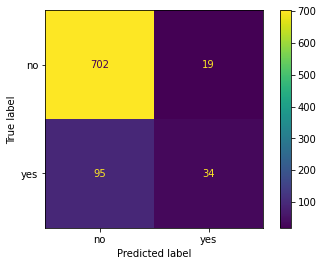



              precision    recall  f1-score   support

    Churn No       0.88      0.97      0.92       721
   Churn Yes       0.64      0.26      0.37       129

    accuracy                           0.87       850
   macro avg       0.76      0.62      0.65       850
weighted avg       0.84      0.87      0.84       850

----------------------------------------
Support Vector Classification Model Evaluation


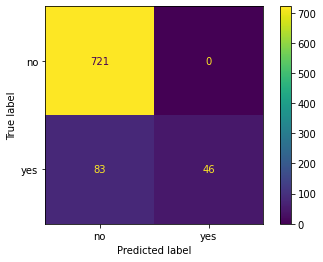



              precision    recall  f1-score   support

    Churn No       0.90      1.00      0.95       721
   Churn Yes       1.00      0.36      0.53       129

    accuracy                           0.90       850
   macro avg       0.95      0.68      0.74       850
weighted avg       0.91      0.90      0.88       850

----------------------------------------
KNN Model Evaluation


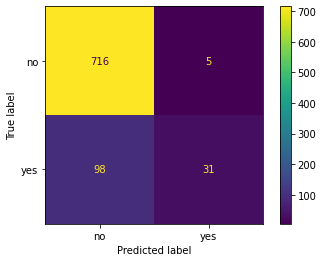



              precision    recall  f1-score   support

    Churn No       0.88      0.99      0.93       721
   Churn Yes       0.86      0.24      0.38       129

    accuracy                           0.88       850
   macro avg       0.87      0.62      0.65       850
weighted avg       0.88      0.88      0.85       850

----------------------------------------
Decision Tree Model Evaluation


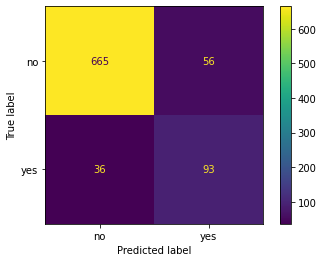



              precision    recall  f1-score   support

    Churn No       0.95      0.92      0.94       721
   Churn Yes       0.62      0.72      0.67       129

    accuracy                           0.89       850
   macro avg       0.79      0.82      0.80       850
weighted avg       0.90      0.89      0.89       850

----------------------------------------
Random Forest Model Evaluation


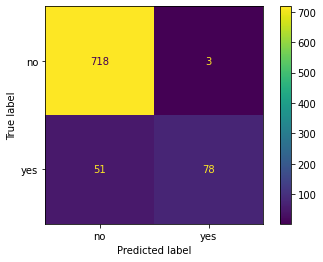



              precision    recall  f1-score   support

    Churn No       0.93      1.00      0.96       721
   Churn Yes       0.96      0.60      0.74       129

    accuracy                           0.94       850
   macro avg       0.95      0.80      0.85       850
weighted avg       0.94      0.94      0.93       850

----------------------------------------


In [68]:
for modeling, name in zip(my_model, model_name):
  model = modeling
  model = model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  print(f"{name} Model Evaluation")
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()
  print('\n')
  print(classification_report(y_test, y_pred,
                            target_names=["Churn No", "Churn Yes"]))
  print(20*'--')
  

# 7. Resampling

## Oversampling and Undersampling

In [69]:
from sklearn.utils import resample
samples = int((2931+469)/2)

In [70]:
data2 = X_train

In [71]:
data2['churn'] = y_train

In [72]:
data2

,state:AK,state:AL,state:AR,state:AZ,state:CA,state:CO,state:CT,state:DC,state:DE,state:FL,...,total_day_calls norm,total_eve_calls norm,total_intl_minutes norm,total_intl_calls norm,number_customer_service_calls norm,total_day_minutes std,total_eve_minutes std,total_night_minutes std,total_night_calls std,churn
1340,0,0,0,0,0,0,0,0,0,0,...,0.721212,0.741176,0.642487,0.15,0.111111,-0.003181,-0.033235,0.335900,-1.470170,no
3790,0,0,0,0,0,0,0,0,0,0,...,0.606061,0.629412,0.642487,0.25,0.111111,0.194780,0.185139,0.045741,0.058251,no
2647,0,0,0,0,0,0,0,0,0,0,...,0.509091,0.600000,0.585492,0.25,0.000000,0.457495,0.010841,0.387572,-0.138965,no
4009,0,0,0,0,0,0,0,0,0,0,...,0.606061,0.529412,0.176166,0.20,0.111111,0.403842,-0.632260,0.628046,0.945721,no
3537,0,0,0,0,0,0,0,0,0,0,...,0.648485,0.594118,0.430052,0.35,0.111111,-0.408354,-0.379828,0.002018,1.290849,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0,0,0,0,0,0,1,0,0,...,0.509091,0.682353,0.616580,0.15,0.000000,0.278035,0.581818,-0.296090,2.326231,no
466,0,0,0,0,0,0,0,0,0,0,...,0.460606,0.588235,0.243523,0.20,0.333333,0.570352,-0.229571,-1.534233,0.107555,no
3092,0,0,0,0,0,0,0,0,0,0,...,0.660606,0.629412,0.569948,0.25,0.555556,0.305787,-1.525789,-0.037729,-0.286876,yes
3772,0,0,0,0,0,0,0,0,0,0,...,0.654545,0.411765,0.626943,0.10,0.111111,0.333538,-0.389845,0.769150,-0.681308,no


In [73]:
df_majority = data2[(data2['churn']=='no')] 
df_minority = data2[(data2['churn']=='yes')] 

In [74]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples = samples, # to match majority class
                                 random_state=42) 
df_majority_downsampled = resample(df_majority, 
                                 replace=True,
                                 n_samples = samples, # to match minority class
                                 random_state=42) 

In [75]:
res = pd.concat([df_minority_upsampled, df_majority_downsampled])

In [76]:
X_res = res.drop('churn',axis=1)
y_res = res['churn']

In [77]:
X_res

,state:AK,state:AL,state:AR,state:AZ,state:CA,state:CO,state:CT,state:DC,state:DE,state:FL,...,account_length:very long,total_day_calls norm,total_eve_calls norm,total_intl_minutes norm,total_intl_calls norm,number_customer_service_calls norm,total_day_minutes std,total_eve_minutes std,total_night_minutes std,total_night_calls std
3512,0,0,0,0,0,0,0,0,0,0,...,0,0.563636,0.717647,0.658031,0.20,0.111111,1.393649,0.479643,2.327263,-0.730611
1696,0,0,0,0,0,0,0,0,0,0,...,0,0.660606,0.394118,0.554404,0.70,0.111111,1.965332,-0.445941,0.278265,2.572751
2785,0,0,1,0,0,0,0,0,0,0,...,0,0.848485,0.782353,0.518135,0.15,0.444444,-1.348208,0.756117,1.423001,0.797810
3713,0,0,0,0,0,0,0,0,1,0,...,0,0.606061,0.523529,0.637306,0.40,0.444444,-0.687720,-0.141420,-2.796225,-0.927827
1859,0,0,0,0,0,0,0,0,0,0,...,0,0.448485,0.517647,0.564767,0.10,0.333333,0.960724,2.537165,0.522714,0.945721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,0,0,0,0,0,0,0,0,0,0,...,0,0.806061,0.552941,0.352332,0.40,0.111111,0.081924,-0.674332,0.496878,0.255467
3738,0,0,0,0,0,0,0,0,0,0,...,0,0.515152,0.547059,0.450777,0.25,0.111111,-0.067935,-1.627964,0.546563,-0.484092
1965,0,0,0,0,0,0,0,0,0,0,...,0,0.630303,0.670588,0.559585,0.10,0.111111,-0.530461,0.836254,2.066915,0.452682
970,0,0,0,0,1,0,0,0,0,0,...,0,0.666667,0.547059,0.575130,0.30,0.111111,0.052322,0.125036,0.071577,0.945721


Logistic Regression Model Evaluation


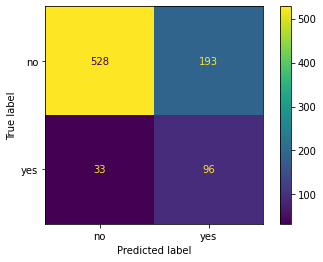



              precision    recall  f1-score   support

    Churn No       0.94      0.73      0.82       721
   Churn Yes       0.33      0.74      0.46       129

    accuracy                           0.73       850
   macro avg       0.64      0.74      0.64       850
weighted avg       0.85      0.73      0.77       850

----------------------------------------
Support Vector Classification Model Evaluation


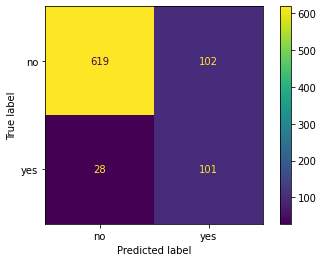



              precision    recall  f1-score   support

    Churn No       0.96      0.86      0.90       721
   Churn Yes       0.50      0.78      0.61       129

    accuracy                           0.85       850
   macro avg       0.73      0.82      0.76       850
weighted avg       0.89      0.85      0.86       850

----------------------------------------
KNN Model Evaluation


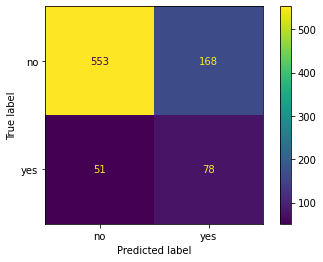



              precision    recall  f1-score   support

    Churn No       0.92      0.77      0.83       721
   Churn Yes       0.32      0.60      0.42       129

    accuracy                           0.74       850
   macro avg       0.62      0.69      0.63       850
weighted avg       0.82      0.74      0.77       850

----------------------------------------
Decision Tree Model Evaluation


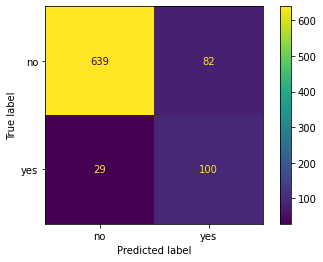



              precision    recall  f1-score   support

    Churn No       0.96      0.89      0.92       721
   Churn Yes       0.55      0.78      0.64       129

    accuracy                           0.87       850
   macro avg       0.75      0.83      0.78       850
weighted avg       0.89      0.87      0.88       850

----------------------------------------
Random Forest Model Evaluation


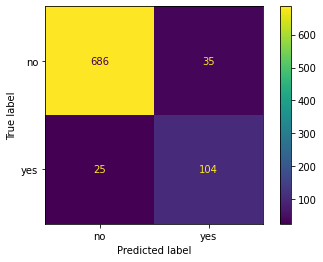



              precision    recall  f1-score   support

    Churn No       0.96      0.95      0.96       721
   Churn Yes       0.75      0.81      0.78       129

    accuracy                           0.93       850
   macro avg       0.86      0.88      0.87       850
weighted avg       0.93      0.93      0.93       850

----------------------------------------


In [78]:
for modeling, name in zip(my_model, model_name):
  model = modeling
  model = model.fit(X_res, y_res)

  y_pred = model.predict(X_test)
  print(f"{name} Model Evaluation")
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()
  print('\n')
  print(classification_report(y_test, y_pred,
                            target_names=["Churn No", "Churn Yes"]))
  print(20*'--')

## SMOTE

In [83]:
X_train = X_train.drop('churn',axis=1)

In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_sm, y_res_sm = sm.fit_resample(X_train, y_train)

Logistic Regression Model Evaluation


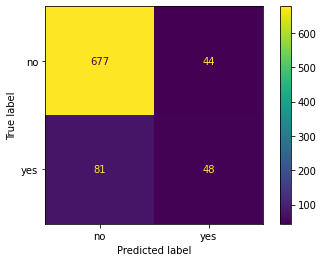



              precision    recall  f1-score   support

    Churn No       0.89      0.94      0.92       721
   Churn Yes       0.52      0.37      0.43       129

    accuracy                           0.85       850
   macro avg       0.71      0.66      0.67       850
weighted avg       0.84      0.85      0.84       850

----------------------------------------
Support Vector Classification Model Evaluation


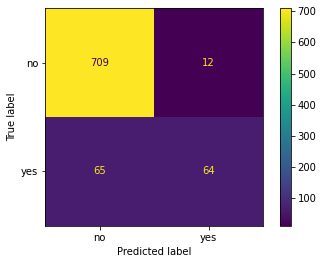



              precision    recall  f1-score   support

    Churn No       0.92      0.98      0.95       721
   Churn Yes       0.84      0.50      0.62       129

    accuracy                           0.91       850
   macro avg       0.88      0.74      0.79       850
weighted avg       0.90      0.91      0.90       850

----------------------------------------
KNN Model Evaluation


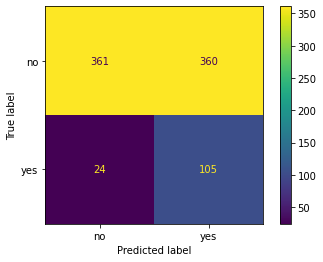



              precision    recall  f1-score   support

    Churn No       0.94      0.50      0.65       721
   Churn Yes       0.23      0.81      0.35       129

    accuracy                           0.55       850
   macro avg       0.58      0.66      0.50       850
weighted avg       0.83      0.55      0.61       850

----------------------------------------
Decision Tree Model Evaluation


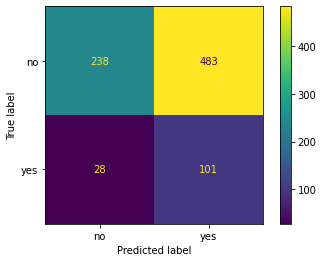



              precision    recall  f1-score   support

    Churn No       0.89      0.33      0.48       721
   Churn Yes       0.17      0.78      0.28       129

    accuracy                           0.40       850
   macro avg       0.53      0.56      0.38       850
weighted avg       0.79      0.40      0.45       850

----------------------------------------
Random Forest Model Evaluation


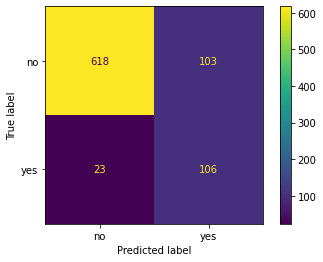



              precision    recall  f1-score   support

    Churn No       0.96      0.86      0.91       721
   Churn Yes       0.51      0.82      0.63       129

    accuracy                           0.85       850
   macro avg       0.74      0.84      0.77       850
weighted avg       0.89      0.85      0.86       850

----------------------------------------


In [85]:
for modeling, name in zip(my_model, model_name):
  model = modeling
  model = model.fit(X_res_sm, y_res_sm)

  y_pred = model.predict(X_test)
  print(f"{name} Model Evaluation")
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()
  print('\n')
  print(classification_report(y_test, y_pred,
                            target_names=["Churn No", "Churn Yes"]))
  print(20*'--')

## Borderline SMOTE

In [86]:
from imblearn.over_sampling import BorderlineSMOTE
blsm = BorderlineSMOTE(random_state=42)
X_res_blsm , y_res_blsm  = blsm.fit_resample(X_train, y_train)

Logistic Regression Model Evaluation


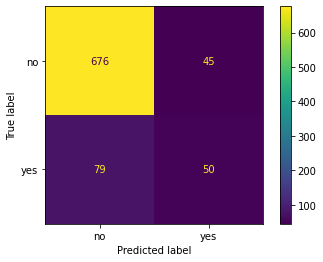



              precision    recall  f1-score   support

    Churn No       0.90      0.94      0.92       721
   Churn Yes       0.53      0.39      0.45       129

    accuracy                           0.85       850
   macro avg       0.71      0.66      0.68       850
weighted avg       0.84      0.85      0.84       850

----------------------------------------
Support Vector Classification Model Evaluation


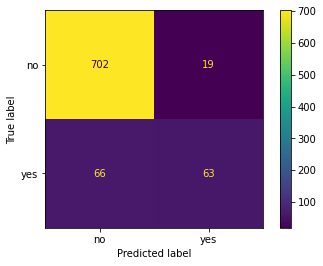



              precision    recall  f1-score   support

    Churn No       0.91      0.97      0.94       721
   Churn Yes       0.77      0.49      0.60       129

    accuracy                           0.90       850
   macro avg       0.84      0.73      0.77       850
weighted avg       0.89      0.90      0.89       850

----------------------------------------
KNN Model Evaluation


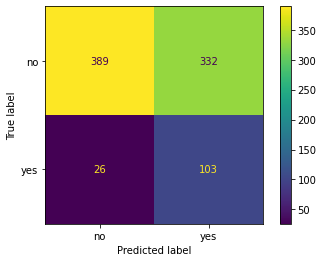



              precision    recall  f1-score   support

    Churn No       0.94      0.54      0.68       721
   Churn Yes       0.24      0.80      0.37       129

    accuracy                           0.58       850
   macro avg       0.59      0.67      0.53       850
weighted avg       0.83      0.58      0.64       850

----------------------------------------
Decision Tree Model Evaluation


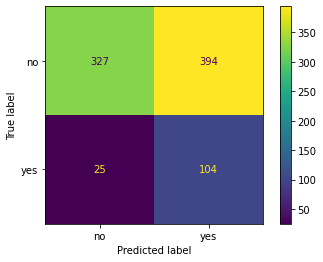



              precision    recall  f1-score   support

    Churn No       0.93      0.45      0.61       721
   Churn Yes       0.21      0.81      0.33       129

    accuracy                           0.51       850
   macro avg       0.57      0.63      0.47       850
weighted avg       0.82      0.51      0.57       850

----------------------------------------
Random Forest Model Evaluation


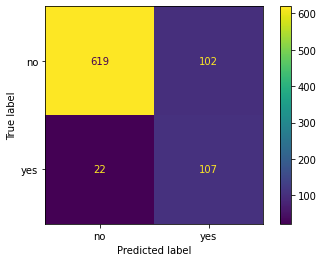



              precision    recall  f1-score   support

    Churn No       0.97      0.86      0.91       721
   Churn Yes       0.51      0.83      0.63       129

    accuracy                           0.85       850
   macro avg       0.74      0.84      0.77       850
weighted avg       0.90      0.85      0.87       850

----------------------------------------


In [87]:
for modeling, name in zip(my_model, model_name):
  model = modeling
  model = model.fit(X_res_blsm , y_res_blsm)

  y_pred = model.predict(X_test)
  print(f"{name} Model Evaluation")
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()
  print('\n')
  print(classification_report(y_test, y_pred,
                            target_names=["Churn No", "Churn Yes"]))
  print(20*'--')

## SVM SMOTE

In [88]:
from imblearn.over_sampling import SVMSMOTE
svms = SVMSMOTE(random_state=42)
X_res_svms, y_res_svms = svms.fit_resample(X_train, y_train)

Logistic Regression Model Evaluation


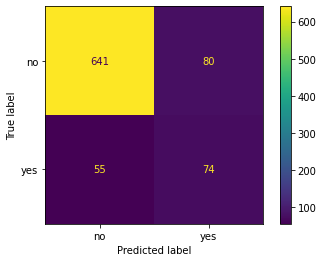



              precision    recall  f1-score   support

    Churn No       0.92      0.89      0.90       721
   Churn Yes       0.48      0.57      0.52       129

    accuracy                           0.84       850
   macro avg       0.70      0.73      0.71       850
weighted avg       0.85      0.84      0.85       850

----------------------------------------
Support Vector Classification Model Evaluation


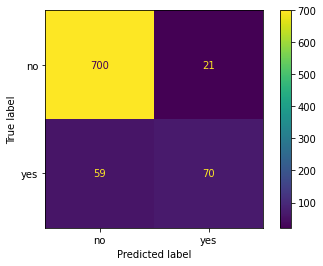



              precision    recall  f1-score   support

    Churn No       0.92      0.97      0.95       721
   Churn Yes       0.77      0.54      0.64       129

    accuracy                           0.91       850
   macro avg       0.85      0.76      0.79       850
weighted avg       0.90      0.91      0.90       850

----------------------------------------
KNN Model Evaluation


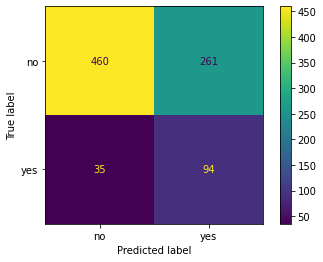



              precision    recall  f1-score   support

    Churn No       0.93      0.64      0.76       721
   Churn Yes       0.26      0.73      0.39       129

    accuracy                           0.65       850
   macro avg       0.60      0.68      0.57       850
weighted avg       0.83      0.65      0.70       850

----------------------------------------
Decision Tree Model Evaluation


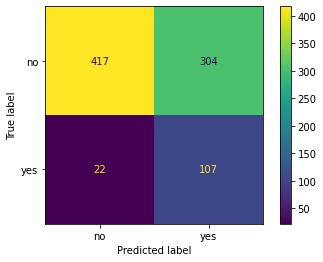



              precision    recall  f1-score   support

    Churn No       0.95      0.58      0.72       721
   Churn Yes       0.26      0.83      0.40       129

    accuracy                           0.62       850
   macro avg       0.61      0.70      0.56       850
weighted avg       0.85      0.62      0.67       850

----------------------------------------
Random Forest Model Evaluation


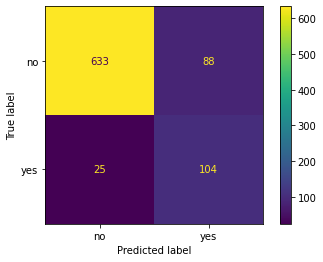



              precision    recall  f1-score   support

    Churn No       0.96      0.88      0.92       721
   Churn Yes       0.54      0.81      0.65       129

    accuracy                           0.87       850
   macro avg       0.75      0.84      0.78       850
weighted avg       0.90      0.87      0.88       850

----------------------------------------


In [89]:
for modeling, name in zip(my_model, model_name):
  model = modeling
  model = model.fit(X_res_svms, y_res_svms)

  y_pred = model.predict(X_test)
  print(f"{name} Model Evaluation")
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()
  print('\n')
  print(classification_report(y_test, y_pred,
                            target_names=["Churn No", "Churn Yes"]))
  print(20*'--')

## ADASYN

In [91]:
from imblearn.over_sampling import ADASYN
ad = ADASYN(random_state=42)
X_res_ad, y_res_ad = ad.fit_resample(X_train, y_train)

Logistic Regression Model Evaluation


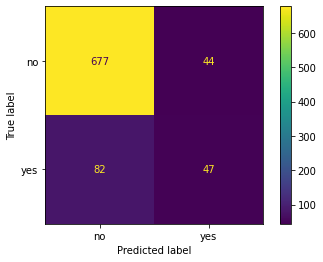



              precision    recall  f1-score   support

    Churn No       0.89      0.94      0.91       721
   Churn Yes       0.52      0.36      0.43       129

    accuracy                           0.85       850
   macro avg       0.70      0.65      0.67       850
weighted avg       0.83      0.85      0.84       850

----------------------------------------
Support Vector Classification Model Evaluation


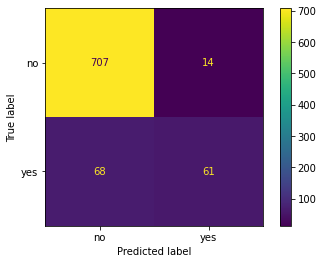



              precision    recall  f1-score   support

    Churn No       0.91      0.98      0.95       721
   Churn Yes       0.81      0.47      0.60       129

    accuracy                           0.90       850
   macro avg       0.86      0.73      0.77       850
weighted avg       0.90      0.90      0.89       850

----------------------------------------
KNN Model Evaluation


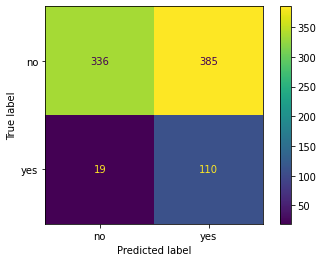



              precision    recall  f1-score   support

    Churn No       0.95      0.47      0.62       721
   Churn Yes       0.22      0.85      0.35       129

    accuracy                           0.52       850
   macro avg       0.58      0.66      0.49       850
weighted avg       0.84      0.52      0.58       850

----------------------------------------
Decision Tree Model Evaluation


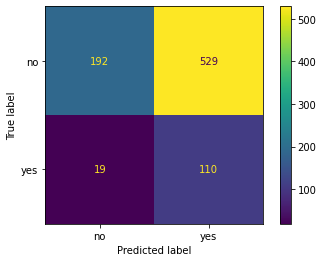



              precision    recall  f1-score   support

    Churn No       0.91      0.27      0.41       721
   Churn Yes       0.17      0.85      0.29       129

    accuracy                           0.36       850
   macro avg       0.54      0.56      0.35       850
weighted avg       0.80      0.36      0.39       850

----------------------------------------
Random Forest Model Evaluation


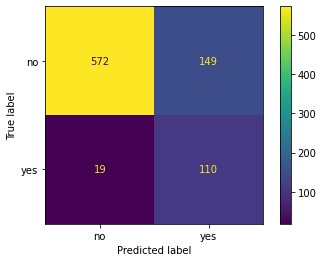



              precision    recall  f1-score   support

    Churn No       0.97      0.79      0.87       721
   Churn Yes       0.42      0.85      0.57       129

    accuracy                           0.80       850
   macro avg       0.70      0.82      0.72       850
weighted avg       0.89      0.80      0.83       850

----------------------------------------


In [92]:
for modeling, name in zip(my_model, model_name):
  model = modeling
  model = model.fit(X_res_ad, y_res_ad)

  y_pred = model.predict(X_test)
  print(f"{name} Model Evaluation")
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()
  print('\n')
  print(classification_report(y_test, y_pred,
                            target_names=["Churn No", "Churn Yes"]))
  print(20*'--')

# 8. Ensemble Method Majority Voting

## Without Resample

In [93]:
from sklearn.ensemble import VotingClassifier

In [94]:
ens_list = list(zip(model_name, my_model))
print(ens_list)

[('Logistic Regression', LogisticRegression()), ('Support Vector Classification', SVC(probability=True)), ('KNN', KNeighborsClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier())]


Ensemble Voting Evaluation


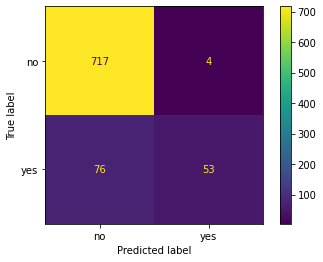



              precision    recall  f1-score   support

    Churn No       0.90      0.99      0.95       721
   Churn Yes       0.93      0.41      0.57       129

    accuracy                           0.91       850
   macro avg       0.92      0.70      0.76       850
weighted avg       0.91      0.91      0.89       850



In [95]:
ensemble = VotingClassifier(estimators=ens_list,voting='soft')
ensemble.fit(X_train, y_train)
ens_pred = ensemble.predict(X_test) 
print("Ensemble Voting Evaluation")
ens_cm = confusion_matrix(y_test, ens_pred, labels=model.classes_)
ens_disp = ConfusionMatrixDisplay(confusion_matrix=ens_cm, display_labels=ensemble.classes_)
ens_disp.plot()
plt.show()
print('\n')
print(classification_report(y_test, ens_pred,
                            target_names=["Churn No", "Churn Yes"]))

## Oversampling & Undersampling

Ensemble Voting Evaluation


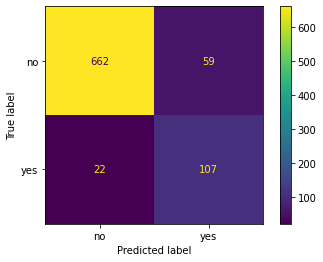



              precision    recall  f1-score   support

    Churn No       0.97      0.92      0.94       721
   Churn Yes       0.64      0.83      0.73       129

    accuracy                           0.90       850
   macro avg       0.81      0.87      0.83       850
weighted avg       0.92      0.90      0.91       850



In [97]:
ensemble_res = VotingClassifier(estimators=ens_list,voting='soft')
ensemble_res.fit(X_res, y_res)
ens_pred = ensemble_res.predict(X_test) 
print("Ensemble Voting Evaluation")
ens_cm = confusion_matrix(y_test, ens_pred, labels=model.classes_)
ens_disp = ConfusionMatrixDisplay(confusion_matrix=ens_cm, display_labels=ensemble.classes_)
ens_disp.plot()
plt.show()
print('\n')
print(classification_report(y_test, ens_pred,
                            target_names=["Churn No", "Churn Yes"]))

## SMOTE

Ensemble Voting Evaluation


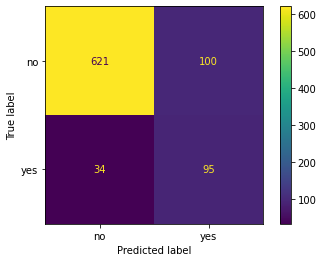



              precision    recall  f1-score   support

    Churn No       0.95      0.86      0.90       721
   Churn Yes       0.49      0.74      0.59       129

    accuracy                           0.84       850
   macro avg       0.72      0.80      0.74       850
weighted avg       0.88      0.84      0.85       850



In [99]:
ensemble_res_sm = VotingClassifier(estimators=ens_list,voting='soft')
ensemble_res_sm.fit(X_res_sm, y_res_sm)
ens_pred = ensemble_res_sm.predict(X_test) 
print("Ensemble Voting Evaluation")
ens_cm = confusion_matrix(y_test, ens_pred, labels=model.classes_)
ens_disp = ConfusionMatrixDisplay(confusion_matrix=ens_cm, display_labels=ensemble.classes_)
ens_disp.plot()
plt.show()
print('\n')
print(classification_report(y_test, ens_pred,
                            target_names=["Churn No", "Churn Yes"]))

## Bordeline SMOTE

Ensemble Voting Evaluation


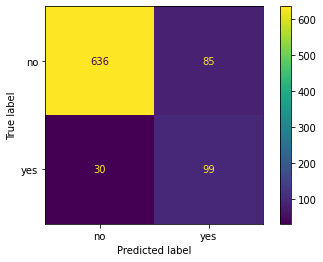



              precision    recall  f1-score   support

    Churn No       0.95      0.88      0.92       721
   Churn Yes       0.54      0.77      0.63       129

    accuracy                           0.86       850
   macro avg       0.75      0.82      0.77       850
weighted avg       0.89      0.86      0.87       850



In [100]:
ensemble_res_blsm = VotingClassifier(estimators=ens_list,voting='soft')
ensemble_res_blsm.fit(X_res_blsm , y_res_blsm)
ens_pred = ensemble_res_blsm.predict(X_test) 
print("Ensemble Voting Evaluation")
ens_cm = confusion_matrix(y_test, ens_pred, labels=model.classes_)
ens_disp = ConfusionMatrixDisplay(confusion_matrix=ens_cm, display_labels=ensemble.classes_)
ens_disp.plot()
plt.show()
print('\n')
print(classification_report(y_test, ens_pred,
                            target_names=["Churn No", "Churn Yes"]))

## SVM SMOTE

Ensemble Voting Evaluation


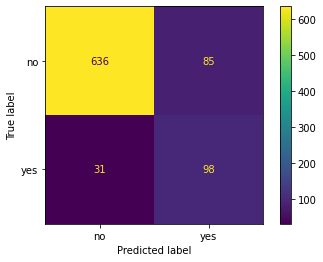



              precision    recall  f1-score   support

    Churn No       0.95      0.88      0.92       721
   Churn Yes       0.54      0.76      0.63       129

    accuracy                           0.86       850
   macro avg       0.74      0.82      0.77       850
weighted avg       0.89      0.86      0.87       850



In [101]:
ensemble_res_svms = VotingClassifier(estimators=ens_list,voting='soft')
ensemble_res_svms.fit(X_res_svms, y_res_svms)
ens_pred = ensemble_res_svms.predict(X_test) 
print("Ensemble Voting Evaluation")
ens_cm = confusion_matrix(y_test, ens_pred, labels=model.classes_)
ens_disp = ConfusionMatrixDisplay(confusion_matrix=ens_cm, display_labels=ensemble.classes_)
ens_disp.plot()
plt.show()
print('\n')
print(classification_report(y_test, ens_pred,
                            target_names=["Churn No", "Churn Yes"]))

## ADASYN

Ensemble Voting Evaluation


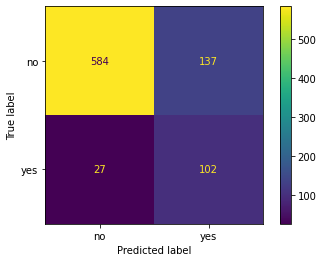



              precision    recall  f1-score   support

    Churn No       0.96      0.81      0.88       721
   Churn Yes       0.43      0.79      0.55       129

    accuracy                           0.81       850
   macro avg       0.69      0.80      0.72       850
weighted avg       0.88      0.81      0.83       850



In [102]:
ensemble_res_ad = VotingClassifier(estimators=ens_list,voting='soft')
ensemble_res_ad.fit(X_res_ad, y_res_ad)
ens_pred = ensemble_res_ad.predict(X_test) 
print("Ensemble Voting Evaluation")
ens_cm = confusion_matrix(y_test, ens_pred, labels=model.classes_)
ens_disp = ConfusionMatrixDisplay(confusion_matrix=ens_cm, display_labels=ensemble.classes_)
ens_disp.plot()
plt.show()
print('\n')
print(classification_report(y_test, ens_pred,
                            target_names=["Churn No", "Churn Yes"]))

# 9. Churn Prediction

## Random Forest with Oversampling & Undersampling

We will use the Random Forest Model using resample with Oversampling & Undersampling because it perform the best based on the model evaluation

In [103]:
val_data = pd.read_csv('drive/MyDrive/Binar Academy/test.csv')

In [104]:
for categories in category_col:
  load_dummy_variables = pd.get_dummies(val_data[categories],prefix=categories,prefix_sep=':')
  dummy_list = load_dummy_variables.columns
  for dummy in  load_dummy_variables:
    val_data[dummy] = load_dummy_variables[dummy]

In [105]:
val_data['account_length'] = pd.cut(val_data['account_length'], 5, labels=('very short', 'short', 'standard', 'long', 'very long'))

In [106]:
dummy_variables = pd.get_dummies(val_data['account_length'],prefix='account_length',prefix_sep=':')
for dummy in  dummy_variables:
    val_data[dummy] = dummy_variables[dummy]

In [107]:
for var in abnormal_dist:
  val_data[var +' norm']= MinMaxScaler().fit_transform(val_data[var].values.reshape(len(val_data),1))

In [108]:
for var in normal_dist:
  val_data[var +' std']= StandardScaler().fit_transform(val_data[var].values.reshape(len(val_data),1))

In [109]:
val_data = val_data.drop(high_corr, axis=1)

In [110]:
for numericals in numerics_col:
  val_data.drop(numericals, axis = 1, inplace=True)

In [111]:
for categories in category_col:
  val_data.drop(categories, axis = 1, inplace=True)

In [112]:
val_data.drop('id', axis = 1, inplace=True)

In [113]:
val_data.columns

Index(['state:AK', 'state:AL', 'state:AR', 'state:AZ', 'state:CA', 'state:CO',
       'state:CT', 'state:DC', 'state:DE', 'state:FL', 'state:GA', 'state:HI',
       'state:IA', 'state:ID', 'state:IL', 'state:IN', 'state:KS', 'state:KY',
       'state:LA', 'state:MA', 'state:MD', 'state:ME', 'state:MI', 'state:MN',
       'state:MO', 'state:MS', 'state:MT', 'state:NC', 'state:ND', 'state:NE',
       'state:NH', 'state:NJ', 'state:NM', 'state:NV', 'state:NY', 'state:OH',
       'state:OK', 'state:OR', 'state:PA', 'state:RI', 'state:SC', 'state:SD',
       'state:TN', 'state:TX', 'state:UT', 'state:VA', 'state:VT', 'state:WA',
       'state:WI', 'state:WV', 'state:WY', 'area_code:area_code_408',
       'area_code:area_code_415', 'area_code:area_code_510',
       'international_plan:no', 'voice_mail_plan:no',
       'account_length:very short', 'account_length:short',
       'account_length:standard', 'account_length:long',
       'account_length:very long', 'total_day_calls norm',
       

In [114]:
model = RandomForestClassifier()
model = model.fit(X_res, y_res)

pred = model.predict(val_data)
result = pd.read_csv('drive/MyDrive/Binar Academy/test.csv') 
result['churn'] = pd.DataFrame(pred)
result.to_csv('drive/MyDrive/Binar Academy/churn_predict.csv')

## Result Data Exploration

In [115]:
churn_cnt = result.groupby(["churn"])[["churn"]].count()
churn_cnt.rename(columns={"churn": "count"}, inplace=True)
churn_cnt.reset_index(inplace=True)
churn_cnt = churn_cnt.reset_index(drop=True).rename_axis(None, axis=1)
churn_cnt = churn_cnt.sort_values(by="count", ascending=False)
churn_cnt

,churn,count
0,no,571
1,yes,179


In [116]:
fig = px.bar(churn_cnt, 
             x="churn", y="count", 
             color="churn",
             color_discrete_sequence=["green", "red"],
             text="count", 
             title="Count per Category")
fig.show()

In [118]:
for categories in category_col:
  cnt = result.groupby([categories, "churn"])[["churn"]].count()
  cnt.rename(columns={"churn": "count"}, inplace=True)
  cnt.reset_index(inplace=True)
  cnt['count'] = round(cnt['count']/df.shape[0] , 2) * 100
  fig = px.bar(cnt, 
             x=categories, y="count", 
             color="churn",
             text=cnt['count'].apply(lambda x: '{0:1.2f}%'.format(x)), 
             barmode="group")
  fig.update_layout(title_text=categories + ' distribution', title_x=0.5, yaxis_tickformat = ',.%', yaxis_title="count percentage")
  fig.show()

In [120]:
cnt = result.groupby(["state", "churn"])[["churn"]].count()
cnt.rename(columns={"churn": "count"}, inplace=True)
cnt.reset_index(inplace=True)
fig = px.bar(cnt, 
            x="state", y="count", 
            color="churn",
            text='count', 
            barmode="group")
fig.update_layout(title_text=categories + ' distribution', title_x=0.5)
fig.show()

In [121]:
for numericals in numerics_col:
  fig = px.histogram(result, x=numericals, facet_col="churn", color = "churn", histnorm='percent')
  fig.update_layout(title_text=numericals + ' distribution', title_x=0.5)
  fig.show()